In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
from analytics_labels import *
from analytics_functions import clean_activations


ACTS = [ACT0, ACT1, ACT2]


In [5]:


def make_df(data):
    df = pd.DataFrame()

    for d in data:
        df_temp = pd.read_csv(d['file'])

        df_temp = df_temp[df_temp[DIST] < 20]
        df_temp[DIST] = df_temp[DIST].apply(lambda x: - x)
        df_temp[LABEL] = d['label']

        for a in ACTS:
            df_temp[a] = df_temp[a].apply(clean_activations)
            df_temp[a] = df_temp[a].apply(np.median)

        df = df.append(df_temp)
    return df


def show(data, pprint=True, thr=False):
    labels = {ACT0: 'Left', ACT1: 'Centre', ACT2: 'Right'}
    if pprint:
        for a in ACTS:
            print('\n  - ' + a + ':\n')
            print('    - Mean: ' + str(round(np.mean(data[a]), 2)))
            print('    - Median: ' + str(round(np.median(data[a]), 2)))
            print('    - Std: ' + str(round(np.std(data[a]), 2)))
        print('\n')

        fig, axs = plt.subplots(1, 3, figsize=(20,5))

        for i, act in enumerate(ACTS):
            axs[i].plot(data[DIST], data[act])
            axs[i].set_title(labels[act])

            axs[i].set_xlabel('Distance')
            axs[i].set_ylabel('Activation')

        fig.suptitle('Activations for: ' + data[LABEL].iloc[0])
        plt.show()

In [8]:
def add_threshold(df, act, t):
    thr = {ACT0: THR_ACT0, ACT1: THR_ACT1, ACT2: THR_ACT2}[act]

    df[thr] = df[act]
    df[thr] = df[thr].apply(lambda x: x * (x >= t))
    return df
    

## No obstacle


  - activation_0:

    - Mean: 91.32
    - Median: 97.72
    - Std: 25.52

  - activation_1:

    - Mean: 16.8
    - Median: 17.6
    - Std: 3.23

  - activation_2:

    - Mean: 206.24
    - Median: 206.18
    - Std: 23.79




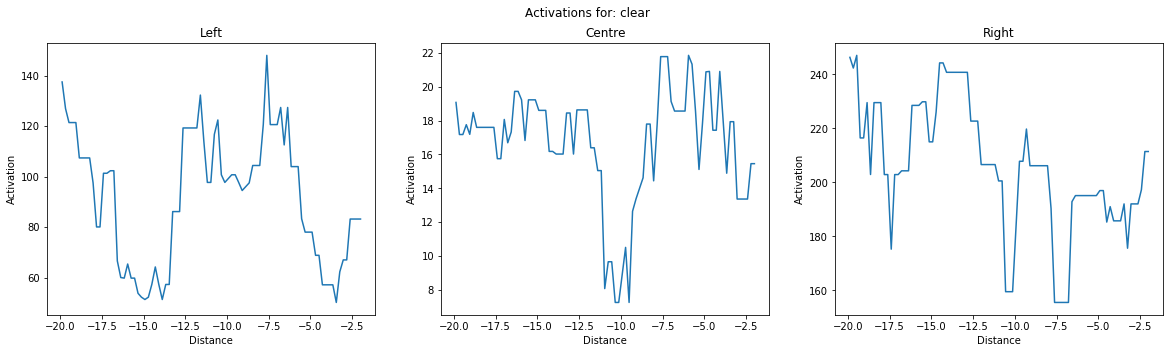

In [9]:

data = [
    {
        'file': 'csv/0-no-obstacle-0.csv',
        'label': 'clear'
    }
]

df = make_df(data)
show(df)



## Central obstacle

In [12]:
data = [
    {
        'file': 'csv/0-central-obstacle-0.csv',
        'label': 'central tree'
    }
]

df = make_df(data)
df = add_threshold(df, ACT1, 10)
df = add_threshold(df, ACT0, 250)
df = add_threshold(df, ACT1, 300)

show(df, thr=True)

TypeError: show() got an unexpected keyword argument 'thr'